In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Table Review: Welcome Survey

## Lecture 4

In [ ]:
welcome = pd.read_csv('welcome_survey_v1.csv')
welcome.head(5)

In [ ]:
np.unique(welcome['Sleep position'])

In [ ]:
# On average, how long do side-sleepers sleep?
side_sleepers = welcome['Sleep position'].str.contains('side', regex=False)
welcome[side_sleepers]['Hours of sleep'].mean()

In [ ]:
# How many students get at least 8 hours of sleep each night (on average)?
# First way:
welcome['Hours of sleep']>8

In [ ]:
np.sum(welcome['Hours of sleep']>8)

In [ ]:
# Second way
np.shape(welcome[welcome['Hours of sleep']>8])[0]

In [ ]:
# Create a table with only the two sleep-related columns, 
# with names 'Hours' and 'Position'
two_col = welcome[['Hours of sleep', 'Sleep position']]
sleep =  two_col.rename(columns={'Hours of sleep':'Hours','Sleep position': 'Position'})
sleep.head(3)

In [ ]:
# Second way
two_col = welcome.drop(['Handedness', 'Extraversion', 'Pant leg', 'Number of textees'],axis=1)
sleep =  two_col.rename(columns={'Hours of sleep':'Hours','Sleep position': 'Position'})
sleep.head(3)

## Census ##

In [ ]:
full = pd.read_csv('nc-est2014-agesex-res.csv')
full

In [ ]:
# Keep only the columns we care about
partial = full[['SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014']]
partial

In [ ]:
# Make things easier to read
simple = partial.rename(columns={'POPESTIMATE2010':'2010','POPESTIMATE2014': '2014'})
simple

In [ ]:
# Sort by age
simple.sort_values('AGE')

In [ ]:
# Sort by age (another way)
simple.sort_values('AGE', ascending=False)

## Line Plots ##

In [ ]:
# Remove the age totals
no_999 = simple[simple.AGE<999]
np.sum(no_999.SEX==0)

In [ ]:
# Remove male and female (keep only combined)
everyone = no_999[no_999.SEX==0][['AGE','2010','2014']]

In [ ]:
everyone

In [ ]:
plt.plot(everyone['AGE'].values, everyone['2010'].values)

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')


ax1.plot(everyone['AGE'].values, everyone['2010'].values,color='b',marker=None,linestyle='-',lw=3,label='US population')

ax1.set_xlabel('Age',fontsize=20,fontweight='bold')
ax1.set_ylabel('2010',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')


ax1.legend(loc=0,markerscale=1.0,prop={'size':14},ncol=1) 
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')


ax1.plot(everyone['AGE'].values, everyone['2010'].values,color='b',marker=None,linestyle='-',lw=3,label='2010')
ax1.plot(everyone['AGE'].values, everyone['2014'].values,color='r',marker=None,linestyle='-',lw=3,label='2014')

ax1.set_title('US Population',fontsize=20,fontweight='bold')

ax1.set_xlabel('Age',fontsize=20,fontweight='bold')
ax1.set_ylabel('2010',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')


ax1.legend(loc=0,markerscale=1.0,prop={'size':14},ncol=1) 
plt.show()

## Males and Females in 2014 ##

In [ ]:
# Let's compare male and female counts per age
males = no_999[no_999.SEX==1][['AGE','2010','2014']]
females = no_999[no_999.SEX==2][['AGE','2010','2014']]

In [1]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')


ax1.plot(males['AGE'].values, males['2014'].values,color='b',marker=None,linestyle='-',lw=3,label='males')
ax1.plot(females['AGE'].values, females['2014'].values,color='r',marker=None,linestyle='-',lw=3,label='females')

ax1.set_title('US Population',fontsize=20,fontweight='bold')

ax1.set_xlabel('Age',fontsize=20,fontweight='bold')
ax1.set_ylabel('Billions',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')


ax1.legend(loc=0,markerscale=1.0,prop={'size':14},ncol=1) 
plt.show()

NameError: name 'plt' is not defined

In [ ]:
males = no_999[no_999.SEX==1][['AGE','2014']]
females = no_999[no_999.SEX==2][['AGE','2014']]
# Create DataFrame
data = {'Age': males['AGE'].values,'Males': males['2014'].values,'Females': females['2014'].values}
pop_2014=pd.DataFrame(data)

total=pop_2014.Males+pop_2014.Females
pct_female = np.round(pop_2014.Females / total * 100,3)
pct_female.values

In [ ]:
# Add female percent to our table
pop_2014['Percent female']=pct_female.values
pop_2014

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')


ax1.plot(pop_2014['Age'].values, pop_2014['Percent female'].values,color='b',marker=None,linestyle='-',lw=3,label='Percent female')

ax1.set_xlabel('Age',fontsize=20,fontweight='bold')
ax1.set_ylabel('Percent',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')


ax1.legend(loc=0,markerscale=1.0,prop={'size':14},ncol=1) 
plt.show()

In [ ]:
# ^^ Look at the y-axis! Trend is not as dramatic as you might think
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')


ax1.plot(pop_2014['Age'].values, pop_2014['Percent female'].values,color='b',marker=None,linestyle='-',lw=3,label='Percent female')

ax1.set_xlabel('Age',fontsize=20,fontweight='bold')
ax1.set_ylabel('Percent',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

ax1.set_ylim([0,100])
ax1.legend(loc=0,markerscale=1.0,prop={'size':14},ncol=1) 
plt.show()

## Scatter Plots ##

In [ ]:
# Actors and their highest grossing movies
actors = pd.read_csv('actors.csv')
actors

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')


ax1.scatter(actors['Number of Movies'].values, actors['Total Gross'].values)
ax1.set_xlabel('Number of Movies',fontsize=20,fontweight='bold')
ax1.set_ylabel('Total Gross',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')


ax1.scatter(actors['Number of Movies'].values, actors['Average per Movie'].values)
ax1.set_xlabel('Number of Movies',fontsize=20,fontweight='bold')
ax1.set_ylabel('Average per Movie',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
plt.show()

In [ ]:
actors.loc[actors['Average per Movie']>400]

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

c=actors['Average per Movie'].values
s=20
sc=ax1.scatter(actors['Number of Movies'].values, actors['Total Gross'].values,marker='o',alpha=0.8,c=c,s=s, cmap='rainbow')
ax1.set_xlabel('Number of Movies',fontsize=20,fontweight='bold')
ax1.set_ylabel('Total Gross',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')

#Color bar
cax = plt.axes([0.95, 0.120, 0.03, 0.76])
clb = plt.colorbar(sc,cax=cax,ticks=[50,100,150,200,300,400])
clb.ax.set_ylabel('Average per Movie',fontsize=20,fontweight='bold')
clb.ax.tick_params(labelsize=18)

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
plt.show()

## Bar Charts ##

In [3]:
# Highest grossing movies as of 2017
top_movies = pd.read_csv('../data/top_movies_2017.csv')
top_movies

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
1,Star Wars,Fox,460998007,1583483200,1977
2,The Sound of Music,Fox,158671368,1266072700,1965
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
4,Titanic,Paramount,658672302,1204368000,1997
...,...,...,...,...,...
195,9 to 5,Fox,103290500,341357800,1980
196,Batman v Superman: Dawn of Justice,Warner Brothers,330360194,340137000,2016
197,The Firm,Paramount,158348367,340028200,1993
198,Suicide Squad,Warner Brothers,325100054,339411900,2016


In [4]:
top_movies.groupby('Studio').count()

,Title,Gross,Gross (Adjusted),Year
Studio,,,,
AVCO,1,1,1,1
Buena Vista,35,35,35,35
Columbia,9,9,9,9
Disney,11,11,11,11
Dreamworks,3,3,3,3
Fox,24,24,24,24
IFC,1,1,1,1
Lionsgate,3,3,3,3
MGM,7,7,7,7


In [5]:
top10_adjusted = top_movies.sort_values('Gross (Adjusted)',ascending=False)[0:10]
top10_adjusted

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
1,Star Wars,Fox,460998007,1583483200,1977
2,The Sound of Music,Fox,158671368,1266072700,1965
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
4,Titanic,Paramount,658672302,1204368000,1997
5,The Ten Commandments,Paramount,65500000,1164590000,1956
6,Jaws,Universal,260000000,1138620700,1975
7,Doctor Zhivago,MGM,111721910,1103564200,1965
8,The Exorcist,Warner Brothers,232906145,983226600,1973
9,Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [6]:
# Convert to millions of dollars for readability
millions = np.round(top10_adjusted['Gross (Adjusted)'].values / 1000000, 3)
top10_adjusted['Millions']= millions
top10_adjusted

,Title,Studio,Gross,Gross (Adjusted),Year,Millions
0,Gone with the Wind,MGM,198676459,1796176700,1939,1796.177
1,Star Wars,Fox,460998007,1583483200,1977,1583.483
2,The Sound of Music,Fox,158671368,1266072700,1965,1266.073
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.085
4,Titanic,Paramount,658672302,1204368000,1997,1204.368
5,The Ten Commandments,Paramount,65500000,1164590000,1956,1164.590
6,Jaws,Universal,260000000,1138620700,1975,1138.621
7,Doctor Zhivago,MGM,111721910,1103564200,1965,1103.564
8,The Exorcist,Warner Brothers,232906145,983226600,1973,983.227
9,Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.010


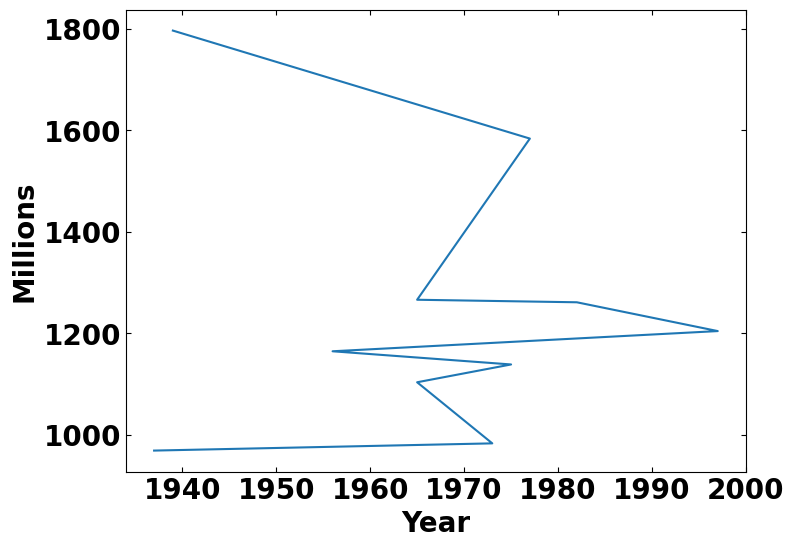

In [7]:
# A line plot doesn't make sense here: don't do this!
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')


ax1.plot(top10_adjusted['Year'].values, top10_adjusted['Millions'].values)
ax1.set_xlabel('Year',fontsize=20,fontweight='bold')
ax1.set_ylabel('Millions',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
plt.show()

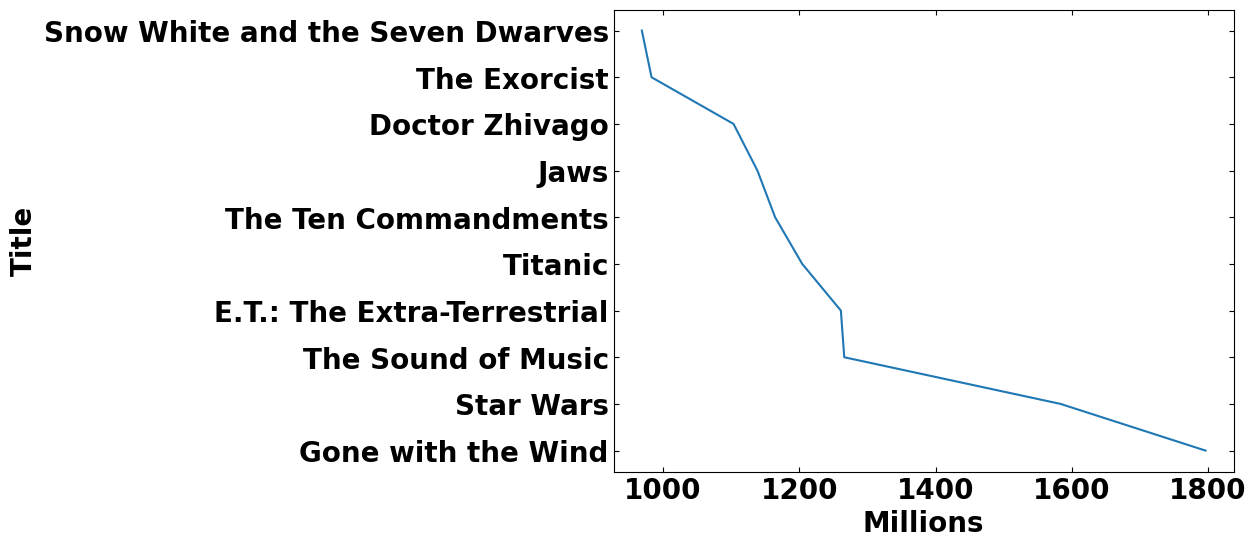

In [8]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')


ax1.plot(top10_adjusted['Millions'].values,top10_adjusted['Title'].values)
ax1.set_ylabel('Title',fontsize=20,fontweight='bold')
ax1.set_xlabel('Millions',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
plt.show()

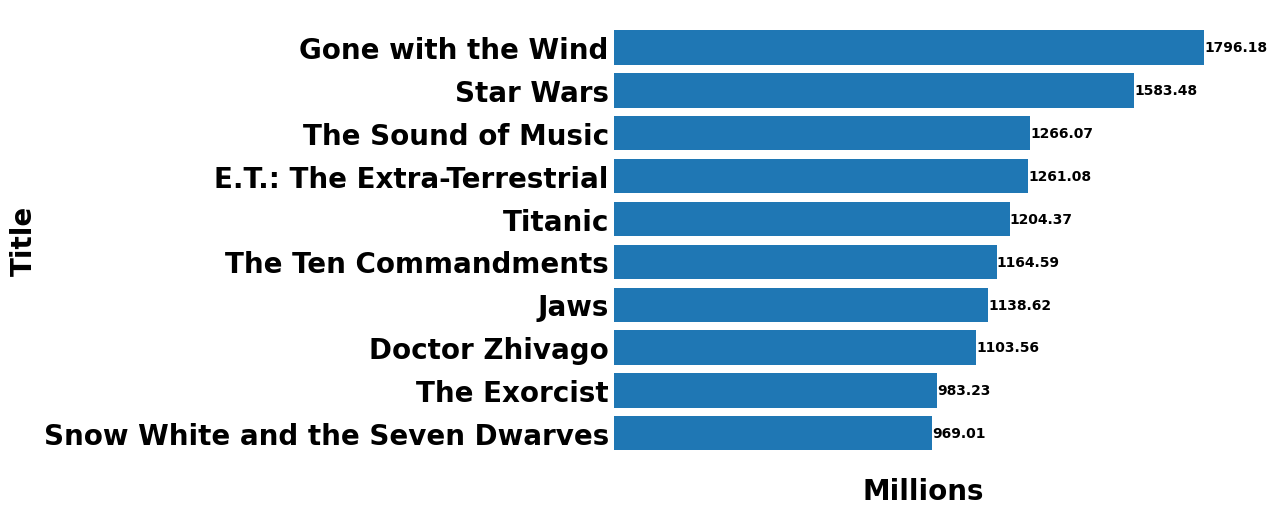

In [9]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

# Horizontal Bar Plot
ax1.barh(top10_adjusted['Title'].values,top10_adjusted['Millions'].values)
ax1.set_ylabel('Title',fontsize=20,fontweight='bold')
ax1.set_xlabel('Millions',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')

# Show top values
ax1.invert_yaxis()
 
# Add annotation to bars
for i in ax1.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='black')


ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
# Remove axes splines
ax1.spines[['right', 'top','left','bottom']].set_visible(False) 

ax1.tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax1.tick_params(axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
plt.show()

## Categorical Distribution ##

In [11]:
studio_distribution=top_movies.groupby('Studio')['Year'].agg('count').reset_index()

In [12]:
studio_distribution=studio_distribution.sort_values(['Year'],ascending=False)

In [13]:
sum(studio_distribution.Year)

200

## Bar Charts ##

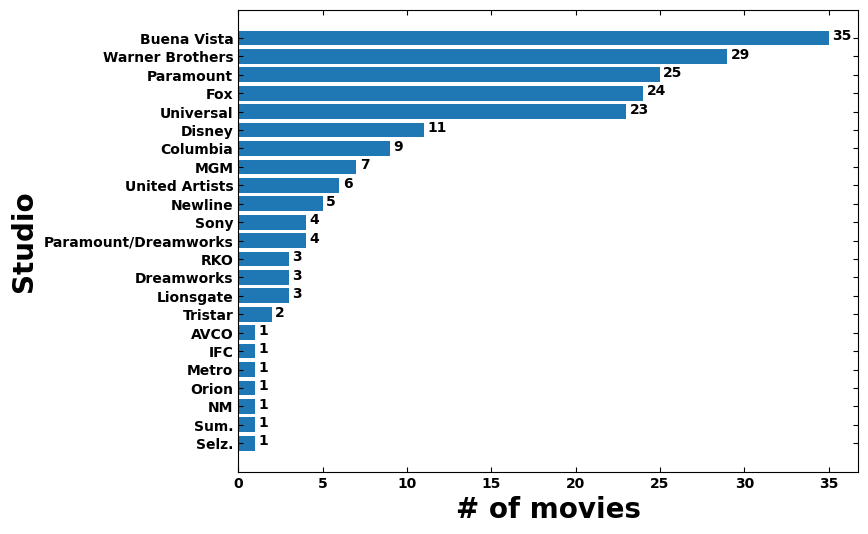

In [14]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

# Horizontal Bar Plot
ax1.barh(studio_distribution.Studio,studio_distribution.Year)
ax1.set_ylabel('Studio',fontsize=20,fontweight='bold')
ax1.set_xlabel('# of movies',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=10,direction='in',right='on',top='on')

# Show top values
ax1.invert_yaxis()
 
# Add annotation to bars
for i in ax1.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='black')


ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
    
plt.show()

## Numerical Distribution ##

In [ ]:
ages = 2024 - top_movies.Year.values
top_movies['Age'] = ages

In [ ]:
top_movies

## Binning and histograms ##

In [ ]:
min(ages), max(ages)

In [ ]:
my_bins = np.array([0, 5, 10, 15, 25, 40, 65, 100])

In [ ]:
# utiliser la fonction histogram de NumPy
counts, bins = np.histogram(top_movies['Age'].values, bins=my_bins)
print(counts,bins)

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

# Horizontal Bar Plot
ax1.hist(top_movies['Age'].values, bins=my_bins)
ax1.set_ylabel('#of movies',fontsize=20,fontweight='bold')
ax1.set_xlabel('Age',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=10,direction='in',right='on',top='on')
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

# Horizontal Bar Plot
ax1.hist(top_movies['Age'].values,histtype='step',color='r', alpha=0.7,lw=3)
ax1.set_ylabel('#of movies',fontsize=20,fontweight='bold')
ax1.set_xlabel('Age',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=10,direction='in',right='on',top='on')
plt.show()

In [ ]:
t=pd.DataFrame(pd.cut(top_movies['Age'].values, bins=my_bins).value_counts())
t

In [ ]:
len(bins),len(counts)
binss=[bins[j+1]-bins[j] for j in range(len(bins)-1)]
counts_pd=pd.cut(top_movies['Age'].values, bins=my_bins).value_counts()
data={'Age counts pd':bins_name,'Bin size':binss,'Age counts':counts,'Percent':100*counts/200}
binned_data=pd.DataFrame(data)
binned_data

## Height ##

### Question: What is the height of the [40, 65] bin?

In [ ]:
# Step 1: Calculate % of movies in the [40, 65) bin

percent = 21.5

In [ ]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40

In [ ]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

## Visualization Review: Welcome Survey ##

In [ ]:
survey = pd.read_csv('welcome_survey_v1.csv')
survey

### Categorical Bar Charts

In [ ]:
handedness = survey.groupby('Handedness')['Hours of sleep'].agg('count').reset_index()
handedness

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

# Horizontal Bar Plot
ax1.barh(handedness.Handedness,handedness['Hours of sleep'])
ax1.set_ylabel('Handedness',fontsize=20,fontweight='bold')
ax1.set_xlabel('Counts',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=10,direction='in',right='on',top='on')

# Show top values
ax1.invert_yaxis()
 
# Add annotation to bars
for i in ax1.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='black')


ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
    
plt.show()

### Numerical Histograms

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

# Horizontal Bar Plot
ax1.hist(survey['Extraversion'],rwidth=0.9)
ax1.set_ylabel('counts',fontsize=20,fontweight='bold')
ax1.set_xlabel('Extraversion',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=10,direction='in',right='on',top='on')

 


ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
    
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

# Horizontal Bar Plot
ax1.hist(survey['Hours of sleep'],rwidth=0.9)
ax1.set_ylabel('counts',fontsize=20,fontweight='bold')
ax1.set_xlabel('Hours of sleep',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=10,direction='in',right='on',top='on')

 


ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
    
plt.show()

In [ ]:
max(survey['Hours of sleep'])

In [ ]:
sleep_bins = np.arange(4,12,0.5)

In [ ]:
right=survey[survey['Pant leg'].str.contains('Right', regex=False)]
left=survey[survey['Pant leg'].str.contains('Left', regex=False)]
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

# Horizontal Bar Plot
ax1.hist(left['Hours of sleep'],rwidth=0.9,bins=sleep_bins)
ax1.set_ylabel('counts',fontsize=20,fontweight='bold')
ax1.set_xlabel('Hours of sleep',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=10,direction='in',right='on',top='on')
ax1.set_title('Left leg first',fontsize=20,fontweight='bold')
 


ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
    
plt.show()


In [ ]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

# Horizontal Bar Plot
ax1.hist(right['Hours of sleep'],rwidth=0.9,bins=sleep_bins)
ax1.set_ylabel('counts',fontsize=20,fontweight='bold')
ax1.set_xlabel('Hours of sleep',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=10,direction='in',right='on',top='on')
ax1.set_title('Right leg first',fontsize=20,fontweight='bold')
 


ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
    
plt.show()

## Histogram Review: Heights and Heredity ##

In [ ]:
galton = pd.read_csv('galton.csv')
galton

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

ax1.hist(galton.midparentHeight,histtype='step',color='k', alpha=0.4,lw=4,zorder=1,label='midparentHeight')

ax1.hist(galton.childHeight,histtype='step',color='r', alpha=0.4,lw=4,zorder=1,label='childHeight')

ax1.set_xlabel('height',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')
ax1.legend(loc=0,markerscale=1.0,prop={'size':14},ncol=1) 
plt.show()

In [ ]:
data={'Person': np.array(['Jim', 'Pam', 'Michael', 'Creed']),
    'Birth Year': np.array([1985, 1988, 1967, 1904])}
ages=pd.DataFrame(data)
ages



In [ ]:
def name_and_age(name, year):
    age = 2019 - year
    return name + ' is ' + str(age)



In [ ]:
ages.apply(lambda x: name_and_age(x['Person'], x['Birth Year']), axis=1) 